In [2]:
#1-
import pandas as pd

# archivo cashrequest.csv
ruta_archivo = './cashrequest.csv'
CR = pd.read_csv(ruta_archivo)
# Muestra información básica sobre el DataFrame
print(CR.info())
# Estadísticas descriptivas iniciales para columnas numéricas
print(CR.describe())
# Lista de columnas del DataFrame
print(CR.columns)
# Muestra las primeras y últimas filas para inspección inicial
#print(datos.head())
#print(datos.tail())

# archivo extractfees.csv
ruta_archivo = './extractfees.csv'
fees = pd.read_csv(ruta_archivo)
# Muestra información básica sobre el DataFrame
print(fees.info())
# Estadísticas descriptivas iniciales para columnas numéricas
print(fees.describe())
# Lista de columnas del DataFrame
print(fees.columns)
# Muestra las primeras y últimas filas para inspección inicial
#print(datos.head())
#print(datos.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [ ]:
CR.info()
CR['status'].unique()

El database cash request deberia tener una columna de 'reason' Filled only if the CR was manually reviewed and rejected. That's the rejection's reason displayed in-app.

Pero no parece existir

En status no aparecen los valores: 'approved', 'money_sent', 'pending', 'waiting_user_confirmation','waiting reimbursement', 'active'

cash_request_debited_date no aparece

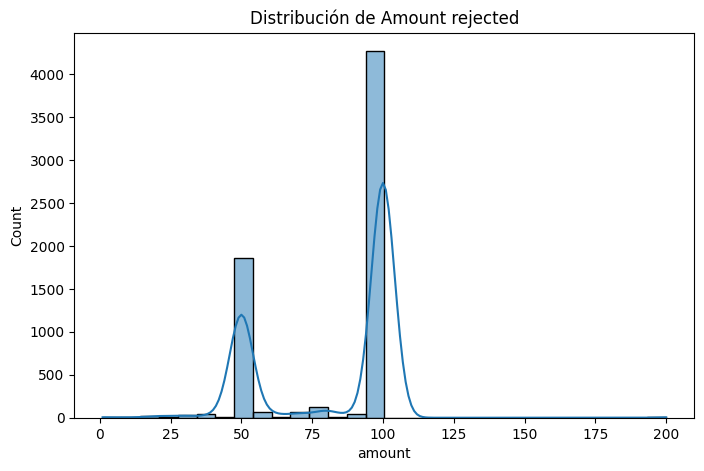

status
rejected    6568
Name: count, dtype: int64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

rejected=CR[CR['status']=='rejected'].reset_index()

# Histograma de montos
plt.figure(figsize=(8, 5))
sns.histplot(rejected['amount'], bins=30, kde=True)
plt.title('Distribución de Amount rejected')
plt.show()

# Conteo de categorías en 'status'
print(rejected['status'].value_counts())

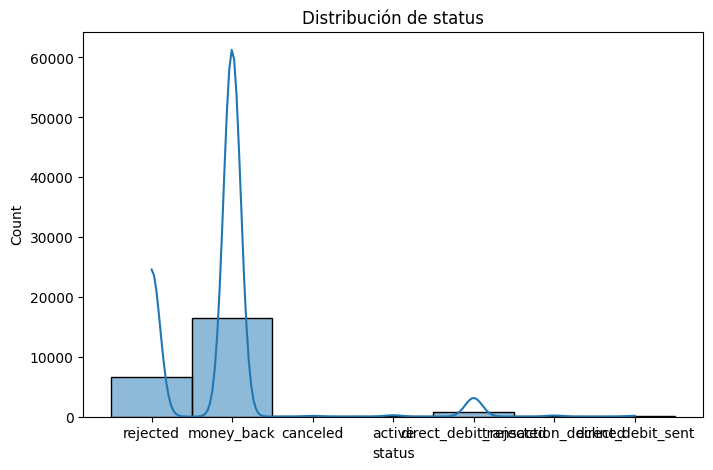

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(CR['status'], bins=30, kde=True)
plt.title('Distribución de status')
plt.show()

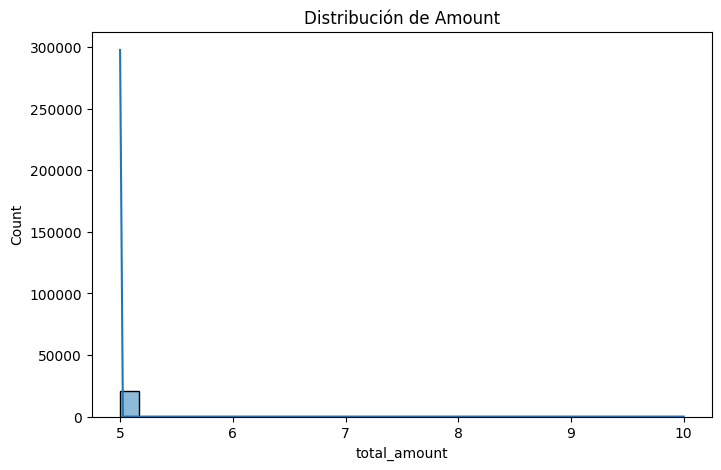

total_amount
5.0     21060
10.0        1
Name: count, dtype: int64


In [6]:
# Histograma de montos
plt.figure(figsize=(8, 5))
sns.histplot(fees['total_amount'], bins=30, kde=True)
plt.title('Distribución de Amount')
plt.show()

# Conteo de categorías en 'status'
print(fees['total_amount'].value_counts())

todas las transacciones con fees (exceptop una) tienen una fee asociada de 5 (puede ser porcentaje)

In [7]:
#top 5 de usuarios que tienen cuenta activa y que han pedido más vecés retirada de efectivo y han gastado más

freq_id=CR.groupby(['user_id']).agg(Num_Solicitudes=('user_id', 'count'), Total_request=('amount','sum')).reset_index()

top_5_amount=freq_id.sort_values(by='Total_request', ascending=False).head(5)

top_5_n_sol=freq_id.sort_values(by='Num_Solicitudes', ascending=False).head(5)



top_5_amount

,user_id,Num_Solicitudes,Total_request
1912,13851.0,18,1750.0
365,2530.0,17,1600.0
165,1159.0,17,1565.0
2415,17329.0,15,1480.0
1344,9901.0,16,1410.0


vemos que los tops no coinciden. Las IDs que más veces han pedido no son las que más efectivo han retirado

In [9]:
deleted_accounts=CR.dropna(subset=['deleted_account_id']).reset_index()

freq_deleted_accounts= deleted_accounts.groupby(['deleted_account_id']).agg(Num_Solicitudes=('deleted_account_id', 'count'), Total_request=('amount', 'sum')).reset_index()

top_5_del_amount=freq_deleted_accounts.sort_values(by='Total_request', ascending=False).head(5)

top_5_del_amount

,deleted_account_id,Num_Solicitudes,Total_request
620,6334.0,19,1750.0
843,11444.0,16,1450.0
335,3767.0,16,1245.0
1033,24168.0,13,1150.0
384,4047.0,15,1010.0
